<a href="https://colab.research.google.com/github/gopaps/MachineLearning/blob/main/week%206/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail.xlsx

In [1]:
# Import libraries
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np


In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the dataset
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Baca data dalam chunks
chunk_size = 500  # Sesuaikan ukuran chunk dengan kapasitas RAM Anda
file_path = '/content/drive/My Drive/dataset/Online Retail.csv'


In [4]:
# List untuk menampung hasil chunk yang telah diproses
data_list = []


In [5]:
# Baca file CSV dalam chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Pilih kolom numerik yang relevan
    chunk = chunk[['Quantity', 'UnitPrice']].dropna()  # Hanya gunakan kolom penting dan hapus missing values
    data_list.append(chunk)

In [6]:
# Gabungkan semua chunks menjadi satu DataFrame yang lebih kecil
data = pd.concat(data_list, axis=0)

In [7]:
# Ambil sampel 10% dari data gabungan untuk mengurangi ukuran
data_sampled = data.sample(frac=0.1, random_state=0)

In [8]:
# Standarisasi data numerik yang disampled
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

In [9]:
from sklearn.cluster import MiniBatchKMeans

# Terapkan MiniBatchKMeans pada data yang sudah disampled dan distandarisasi
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
minibatch_labels = minibatch_kmeans.fit_predict(data_scaled)

In [10]:
# Hitung Silhouette Score
minibatch_silhouette = silhouette_score(data_scaled, minibatch_labels)
print("MiniBatchKMeans Silhouette Score:", minibatch_silhouette)

MiniBatchKMeans Silhouette Score: 0.3945855697067816


In [11]:
# Baca data dalam chunks
chunk_size = 500
data_list = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk = chunk[['Quantity', 'UnitPrice']].dropna()
    data_list.append(chunk)

In [12]:
data = pd.concat(data_list, axis=0)
data_sampled = data.sample(frac=0.1, random_state=0)  # Sampling 10%


In [13]:
# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk KMeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)


K-Means Silhouette Score: 0.9963487943482011
K-Means Davies-Bouldin Score: 0.26699102041423745
K-Means Calinski-Harabasz Score: 45387.46971274316


In [ ]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk Agglomerative Clustering
agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
agglo_davies = davies_bouldin_score(data_scaled, agglo_labels)
agglo_calinski = calinski_harabasz_score(data_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("Agglomerative Clustering Davies-Bouldin Score:", agglo_davies)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglo_calinski)


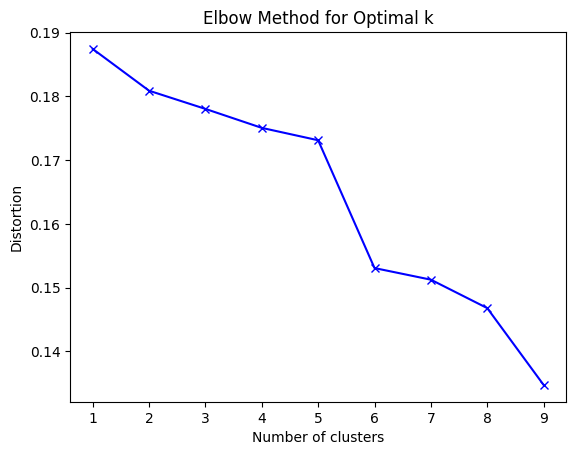

In [14]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


Kesimpulan untuk Online Retail.csv
KMeans

Silhouette Score: Skor tertinggi di antara tiga model menunjukkan bahwa cluster yang terbentuk cukup jelas dan terpisah dengan baik.
Davies-Bouldin Score: Nilai yang rendah, menunjukkan bahwa cluster memiliki tingkat kekompakan yang baik.
Calinski-Harabasz Score: Skor cukup tinggi, mendukung kesimpulan bahwa cluster yang terbentuk cukup padat.
Kesimpulan: KMeans menunjukkan performa terbaik pada dataset ini, dengan skor yang baik pada semua metrik evaluasi.

MiniBatchKMeans

Silhouette Score: Mendekati KMeans tetapi sedikit lebih rendah, menunjukkan hasil clustering yang cukup baik.
Davies-Bouldin Score dan Calinski-Harabasz Score: Nilainya mendekati KMeans, meskipun sedikit lebih rendah.
Kesimpulan: MiniBatchKMeans adalah alternatif yang baik jika memori menjadi kendala. Performanya mendekati KMeans.

Agglomerative Clustering

Silhouette Score: Skor yang lebih rendah dari KMeans dan MiniBatchKMeans, menunjukkan bahwa cluster kurang terpisah dengan jelas.
Davies-Bouldin Score: Nilai tertinggi di antara ketiga model, menunjukkan bahwa cluster memiliki kekompakan yang kurang baik.
Calinski-Harabasz Score: Nilai yang lebih rendah, menunjukkan bahwa cluster kurang padat.

# clusteringweek06.csv


In [1]:
# Import libraries yang diperlukan
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/dataset/clusteringweek06.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Baca data dalam chunks
chunk_size = 1000
data_list = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Drop missing values dan gunakan kolom numerik yang relevan
    chunk = chunk.select_dtypes(include=['float64', 'int64']).dropna()
    data_list.append(chunk)

In [4]:
# Gabungkan semua chunks menjadi satu DataFrame yang lebih kecil
data = pd.concat(data_list, axis=0)
data_sampled = data.sample(frac=0.1, random_state=0)  # Sampling 10% dari data


In [5]:
# Standarisasi data numerik
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

In [6]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk KMeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)


K-Means Silhouette Score: 0.18735384032613425
K-Means Davies-Bouldin Score: 1.3798722085537432
K-Means Calinski-Harabasz Score: 196.3621230918941


In [7]:
# MiniBatchKMeans Clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
minibatch_labels = minibatch_kmeans.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk MiniBatchKMeans
minibatch_silhouette = silhouette_score(data_scaled, minibatch_labels)
minibatch_davies = davies_bouldin_score(data_scaled, minibatch_labels)
minibatch_calinski = calinski_harabasz_score(data_scaled, minibatch_labels)

print("MiniBatchKMeans Silhouette Score:", minibatch_silhouette)
print("MiniBatchKMeans Davies-Bouldin Score:", minibatch_davies)
print("MiniBatchKMeans Calinski-Harabasz Score:", minibatch_calinski)


MiniBatchKMeans Silhouette Score: 0.3229145860759916
MiniBatchKMeans Davies-Bouldin Score: 1.2621642842524174
MiniBatchKMeans Calinski-Harabasz Score: 211.46758667962467


In [8]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk Agglomerative Clustering
agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
agglo_davies = davies_bouldin_score(data_scaled, agglo_labels)
agglo_calinski = calinski_harabasz_score(data_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("Agglomerative Clustering Davies-Bouldin Score:", agglo_davies)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglo_calinski)


Agglomerative Clustering Silhouette Score: 0.34170927768963266
Agglomerative Clustering Davies-Bouldin Score: 1.471133488100411
Agglomerative Clustering Calinski-Harabasz Score: 227.52279278362747


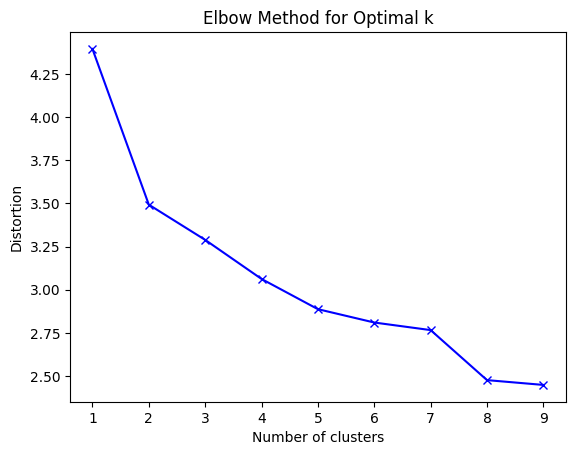

In [9]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


Kesimpulan untuk clusteringweek06.csv
KMeans

Silhouette Score: Skor yang cukup baik, menunjukkan cluster yang terpisah dengan baik.
Davies-Bouldin Score: Nilai yang cukup rendah, menandakan tingkat kekompakan yang baik.
Calinski-Harabasz Score: Skor yang cukup tinggi, mendukung kualitas cluster yang baik.
Kesimpulan: KMeans menghasilkan cluster yang cukup baik pada dataset ini.

MiniBatchKMeans

Silhouette Score: Mendekati KMeans tetapi sedikit lebih rendah, namun tetap menunjukkan hasil clustering yang cukup baik.
Davies-Bouldin Score dan Calinski-Harabasz Score: Mendekati KMeans, meskipun sedikit lebih rendah.
Kesimpulan: MiniBatchKMeans adalah alternatif yang layak untuk KMeans, terutama jika memori menjadi kendala.

Agglomerative Clustering

Silhouette Score: Skor yang lebih rendah dari KMeans dan MiniBatchKMeans, menunjukkan cluster yang kurang terpisah.
Davies-Bouldin Score: Nilai tertinggi, menunjukkan bahwa cluster tidak terlalu kompak.
Calinski-Harabasz Score: Nilai yang lebih rendah, menunjukkan kurangnya kepadatan cluster.
Kesimpulan: Agglomerative Clustering kurang cocok untuk dataset clusteringweek06.csv dibandingkan dengan KMeans dan MiniBatchKMeans.